# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [36]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

## Regression Model Evaluation

In [38]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [39]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [40]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [45]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [47]:
df = data.copy()

In [49]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [51]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [55]:
df.eq(" ").sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [59]:
df.corrwith(df["medv"]).sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
dtype: float64

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [62]:
X = df.drop("medv", axis=1)
y = df["medv"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 506.
80% for training data: 404.
20% for test data: 102.


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [68]:
# Your code here :
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

## 3. Calculate and print R-squared for both the training and the testing set.

In [72]:
# Your code here :
r2 = r2_score(y_test, predictions)
print("R2 = ", round(r2, 4))

R2 =  0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [74]:
# Your code here :
MSE = mean_squared_error(y_test, predictions)
print("MSE =  ", round(MSE, 4)) 

MSE =   24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [76]:
# Your code here :
MAE = mean_absolute_error(y_test, predictions)
print("MAE = ", round(MAE, 4))

MAE =  3.1891


## Classification Model Evaluation

In [79]:
from sklearn.datasets import load_iris
data = load_iris()

In [81]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [83]:
column_names = data.feature_names

In [85]:
df = pd.DataFrame(data['data'],columns=column_names)

In [87]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
target = pd.DataFrame(data.target)

In [91]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [93]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [95]:
# Your code here :
y = data["target"]
X = df

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 150.
80% for training data: 120.
20% for test data: 30.


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [101]:
# Your code here :
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [103]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

In [105]:
print(f'20% for test prediction data: {len(test_predictions)}.')

20% for test prediction data: 30.


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [107]:
# Your code here :
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [109]:
# Your code here :
# Calculate accuracy scores
train_accuracy = model.score(X_test,y_test)
test_accuracy = model.score(X_train, y_train)

# Print the accuracy score
print(f"Test data accuracy: {test_accuracy}")
print(f"Train data accuracy: {train_accuracy}")

Test data accuracy: 0.975
Train data accuracy: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [111]:
# Your code here :
from sklearn.metrics import precision_score

# Calculate precision scores with an appropriate average for multiclass
train_precision = precision_score(y_train, train_predictions, average='weighted')
test_precision = precision_score(y_test, test_predictions, average='weighted')

# Print the precision scores
print("Train data precision (weighted): ", train_precision)
print("Test data precision (weighted): ", test_precision)

Train data precision (weighted):  0.9767857142857144
Test data precision (weighted):  1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [113]:
# Your code here :
from sklearn.metrics import recall_score

# Calculate recall scores with an appropriate average for multiclass
train_recall = recall_score(y_train, train_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')

# Print the recall scores
print("Train data recall (weighted): ", train_recall)
print("Test data recall (weighted): ", test_recall)

Train data recall (weighted):  0.975
Test data recall (weighted):  1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [115]:
# Your code here :
from sklearn.metrics import f1_score

# Calculate F1 scores with an appropriate average for multiclass
train_f1 = f1_score(y_train, train_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Print the F1 scores
print("Train data F1 score (weighted): ", train_f1)
print("Test data F1 score (weighted): ", test_f1)

Train data F1 score (weighted):  0.9749882794186592
Test data F1 score (weighted):  1.0


## 13. Generate confusion matrices for both the training and the testing set.

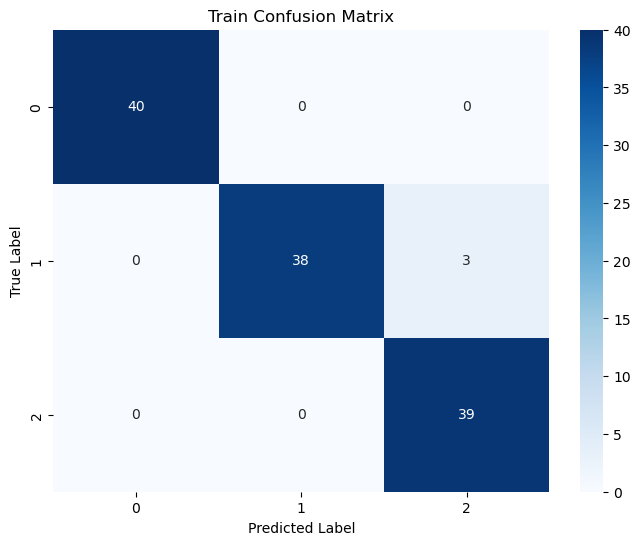

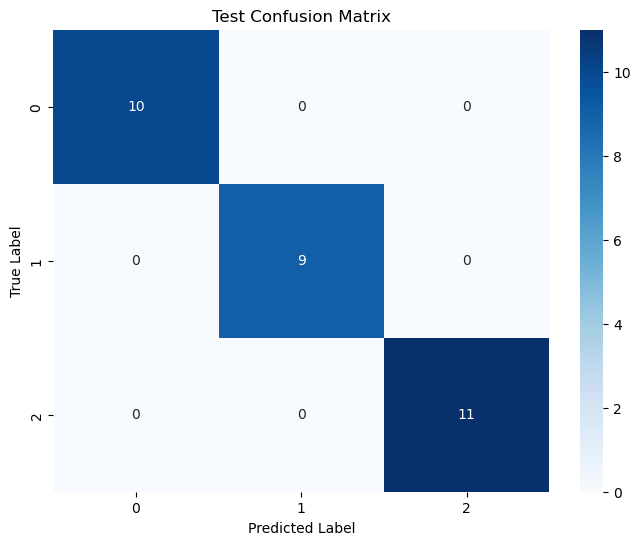

In [117]:
# Your code here :
# Calculate confusion matrices
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assume label_names contains the class labels
label_names = sorted(set(y_train))

# Plot train confusion matrix
plot_confusion_matrix(train_conf_matrix, 'Train Confusion Matrix', label_names)

# Plot test confusion matrix
plot_confusion_matrix(test_conf_matrix, 'Test Confusion Matrix', label_names)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [119]:
# Have fun here !

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=11)
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)

In [121]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [123]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [125]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  1.0
Train data accuracy:  0.9583333333333334


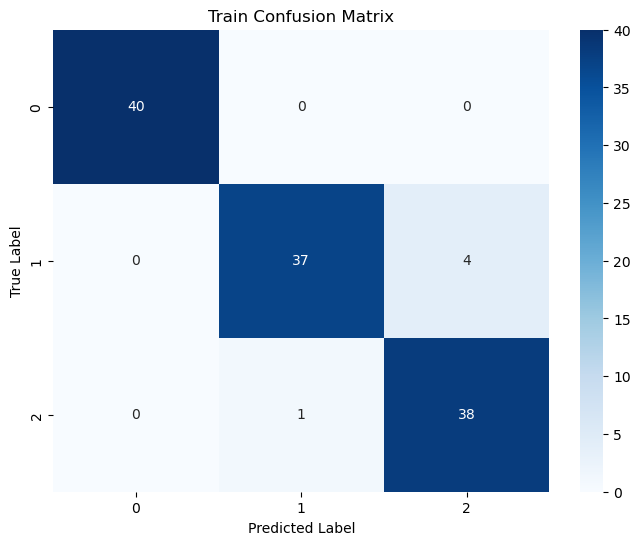

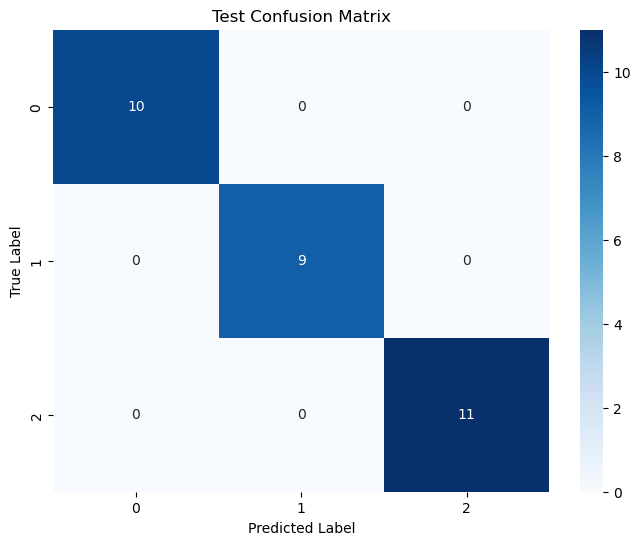

In [127]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

# Calculate confusion matrices
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assume label_names contains the class labels
label_names = sorted(set(y_train))

# Plot train confusion matrix
plot_confusion_matrix(train_conf_matrix, 'Train Confusion Matrix', label_names)

# Plot test confusion matrix
plot_confusion_matrix(test_conf_matrix, 'Test Confusion Matrix', label_names)